In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import tweepy
import requests
import time
import json
import re
import matplotlib.pyplot as plt
import warnings

### Gathring data

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')



### Image Predictions 

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)

In [4]:
#gathering image-predictions.tsv to dataframe
df_image = pd.read_csv('image-predictions.tsv',sep='\t')


### Twitter API

In [5]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [6]:
df_list = []
with open('tweet-json.txt', 'r') as file:
    lines = file.read().splitlines()
    for line_data in lines:
        json_data = json.loads(line_data)
        tweet_id = json_data['id']
        favorite_count = json_data['favorite_count']
        retweet_count = json_data['retweet_count']
        df_list.append({
            'tweet_id': tweet_id,
            'favorite_count': favorite_count,
            'retweet_count': retweet_count
        })
df__tweet = pd.DataFrame(df_list)


##  Visual Asessment

In [7]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


some of the names in p1, p2 and p3 are start with capital letter and some with small letters, it will be all lowercase letter

In [9]:
df__tweet

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


### Programatical Asessment

In [10]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [12]:
df_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Toby           7
an             7
Bailey         7
Daisy          7
Buddy          7
Bella          6
Scout          6
Oscar          6
Stanley        6
Leo            6
Dave           6
Jack           6
Jax            6
Koda           6
Rusty          6
Milo           6
Finn           5
            ... 
Burt           1
River          1
Coleman        1
Aja            1
Steve          1
Harnold        1
life           1
Sailor         1
Timofy         1
Rumpole        1
Craig          1
Aqua           1
Lizzie         1
Shawwn         1
Clybe          1
Toffee         1
Tedders        1
Brandy         1
Erik           1
Dallas         1
Remus          1
Gerbald        1
Sojourner      1
Kawhi          1
Cannon         1
Lulu           1
Tupawc         1
Loomis        

In [13]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [15]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [17]:
df_image.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [18]:
df__tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [19]:
df__tweet.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


## twitter_archive


### Quality

* Tweet_id column is int, it should be string.
* Timestamp column is object, it should be date
* Reformat source column to display clear text.
* drop columns like (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp in_reply_to_status_id,in_reply_to_user_id, in_reply_to_user_id) because we don’t need it
* Name column has ('a' , 'an', 'o', 'the', 'such') which it doesn't make any sens
* Some value in (rating_denominator) column equal to 0.
* Remove the retweeted tweets
### Tidiness
* doggo, floofer, pupper, puppo should be in one column "dog_stage"

* rating_numerator , rating_denominator should be in one column "rate"



## df_image

### Quality 
* tweet_id column is int, it should be string.
* p1, p2, p3 columns sometimes the first letter is capital

### Tidiness
* df_image table should be merge eith the  df_archive table

## df_tweet 

#### Quality
* Tweet_id column is int, it should be a string.

#### Tidness
* tweet_data table should be merge with the df_archive table.

# Cleaning

In [20]:
df__archiv__clean = df_archive.copy()
df__image_clean = df_image.copy()
df_tweet_clean = df__tweet.copy()

## Quality 
### Define
* Tweet_id column is int, it should be string.
* Timestamp column is object, it should be date
#### code


In [22]:
df__archiv__clean.tweet_id = df__archiv__clean.tweet_id.astype(str)
df__archiv__clean.timestamp = pd.to_datetime(df__archiv__clean.timestamp)

### test

In [23]:
df__archiv__clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

## Quality 
### Define
Reformat source column to display clear text.
### code

In [24]:
df__archiv__clean.source = df__archiv__clean.source.str.extract('<a[^>]*>(.*?)</a>')

### test

In [25]:
df__archiv__clean.source.head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

### Quality¶
#### Define
Remove the retweeted tweets, I will keep the orginal tweets

code

In [26]:
df__archiv__clean = df__archiv__clean[np.isnan(df__archiv__clean["retweeted_status_id"])]


In [28]:
df__archiv__clean = df__archiv__clean[np.isnan(df__archiv__clean["retweeted_status_user_id"])]

### test

In [27]:
df__archiv__clean['retweeted_status_id'].count()

0

In [31]:
df__archiv__clean['retweeted_status_user_id'].count()

0

## Quality 
### Define
drop columns like (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp in_reply_to_status_id,in_reply_to_user_id, in_reply_to_user_id) because we don’t need it
### code

In [32]:
df__archiv__clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                       'in_reply_to_status_id','in_reply_to_user_id', 'in_reply_to_user_id'], inplace=True)

### test

In [34]:
df__archiv__clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


## Quality 
### Define
Name column has ('a' , 'an', 'o', 'the', 'such'.. etc) which it doesn't make any sens.
### code

In [35]:
df__archiv__clean['name'][df__archiv__clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### test

In [37]:
df__archiv__clean['name'].sample(20)

1102        None
1202    Bluebert
379        Boots
410        Wyatt
69        Steven
333       Willow
1509         Leo
622         Yogi
587         Sobe
2130       Wally
1875        Zuzu
1715        CeCe
2220        None
2255        None
1985      Cheryl
77           Aja
1691     Glacier
229        Jerry
733         None
1143        None
Name: name, dtype: object

## Quality 
### Define
some value in (rating_denominator) column not equal to 10.
### code

In [40]:
df__archiv__clean =df__archiv__clean[df__archiv__clean.rating_denominator == 10]

### test

In [41]:
(df__archiv__clean['rating_denominator'] == 0).sum()

0

## Tidness
### Define
 doggo, floofer, pupper, puppo should be in one column "dog_stage"
#### code

In [42]:
df__archiv__clean['doggo'] = df__archiv__clean['doggo'].replace('None', '')
df__archiv__clean['floofer'] = df__archiv__clean['floofer'].replace('None', '')
df__archiv__clean['pupper'] = df__archiv__clean['pupper'].replace('None', '')
df__archiv__clean['puppo'] = df__archiv__clean['puppo'].replace('None', '')

In [43]:
df__archiv__clean['dog_stage'] = df__archiv__clean['doggo'] + df__archiv__clean['floofer'] + df__archiv__clean['pupper'] + df__archiv__clean['puppo']

In [44]:
df__archiv__clean['dog_stage'] = df__archiv__clean['dog_stage'].replace('', np.nan)

In [45]:
df__archiv__clean.loc[df__archiv__clean['dog_stage'] == 'doggopupper','dog_stage'] = 'doggo, pupper'
df__archiv__clean.loc[df__archiv__clean['dog_stage'] == 'doggopuppo','dog_stage'] = 'doggo, puppo'
df__archiv__clean.loc[df__archiv__clean['dog_stage'] == 'doggofloofer','dog_stage'] = 'doggo, floofer'

In [46]:
df__archiv__clean = df__archiv__clean.drop(['doggo','pupper','puppo','floofer'], axis=1)

### test

In [47]:
df__archiv__clean['dog_stage'].value_counts()

pupper            224
doggo              75
puppo              24
doggo, pupper      10
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [48]:
df__archiv__clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


## Tidness
### Define
rating_numerator , rating_denominator should be in one column "rate"
#### code

In [49]:
df__archiv__clean['rate'] = df__archiv__clean.rating_numerator/df__archiv__clean.rating_denominator

In [51]:
df__archiv__clean = df__archiv__clean.drop(['rating_numerator','rating_denominator'],axis=1)

### test

In [52]:
df__archiv__clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rate
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3


## Quality
### Define
#### df_image
'tweet_id'column is int, it should be string
#### code

In [53]:
df__image_clean.tweet_id = df__image_clean.tweet_id.astype(str)

## test

In [54]:
df__image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Quality
#### Define¶
##### df_image
p1, p2, p3 columns sometimes the first letter is capital
##### code

In [55]:
df__image_clean['p1'] = df__image_clean['p1'].str.lower()
df__image_clean['p2'] = df__image_clean['p2'].str.lower()
df__image_clean['p3'] = df__image_clean['p3'].str.lower()

##### tese

In [56]:
df__image_clean[['p1', 'p2', 'p3']].sample(5)

,p1,p2,p3
455,shower_curtain,sarong,kimono
119,chihuahua,cowboy_boot,giant_panda
778,old_english_sheepdog,tibetan_terrier,lakeland_terrier
1673,norwegian_elkhound,whippet,siberian_husky
8,shopping_cart,shopping_basket,golden_retriever


### Quality
#### Define¶
##### df_tweet
Tweet_id column is int, it should be a string.
##### code

In [57]:
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype(str)

### test

In [58]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


### Tidness
#### Define¶
df_tweet
tweet_data table should be merge with the df_archive table
##### code

In [59]:
df__archiv__clean = pd.merge(df__archiv__clean,df_tweet_clean,on = 'tweet_id',how = 'inner')

#### test

In [60]:
df__archiv__clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rate,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,39467,8853


### Tidness¶
#### Define¶
###### df_image
df_image table should be merge eith the df_archive table
##### code

In [61]:
df__archiv__clean= pd.merge(df__archiv__clean,df__image_clean[['tweet_id','jpg_url']],on = 'tweet_id',how = 'inner')

### test

In [62]:
df__archiv__clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,rate,favorite_count,retweet_count,jpg_url
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg


# Store

In [63]:
df__archiv__clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# Analyze and Visualize

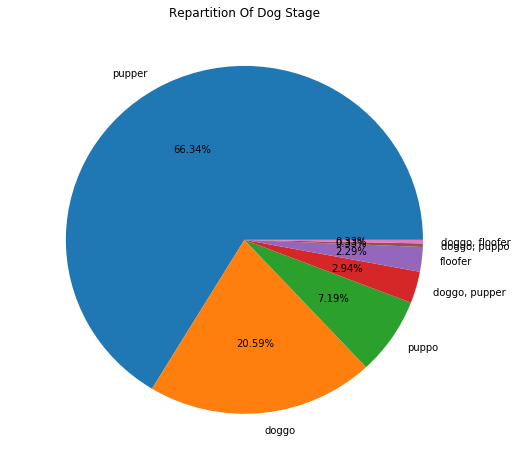

In [64]:
df__archiv__clean['dog_stage'].value_counts().plot(kind = 'pie',legend=False, subplots=True, figsize=(8,8),autopct="%0.2f%%" )
plt.title('Repartition Of Dog Stage', fontsize=12)
plt.ylabel(' ');

The graph shows that people tend more to pupper dogs

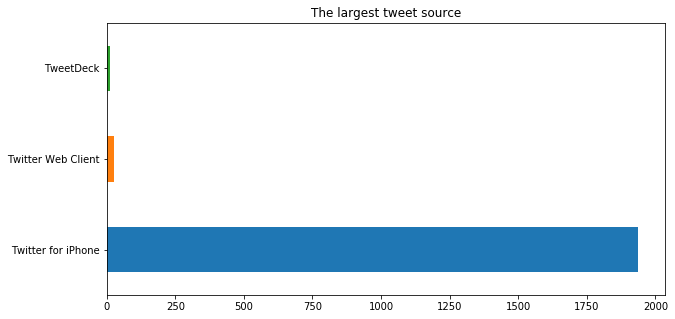

In [65]:
df__archiv__clean['source'].value_counts().plot('barh',  title='The largest tweet source', figsize=(10,5));

the garph shows that Iphone is the largest tweets source

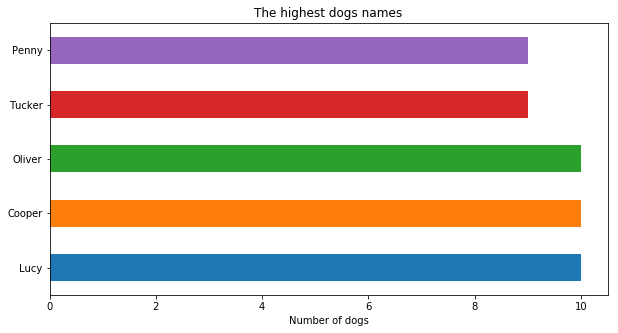

In [78]:
df__archiv__clean.name.value_counts()[2:7].plot('barh', figsize=(10,5), title='The highest dogs names').set_xlabel("Number of dogs");


It seems "lucy", "Cooper" and "Oliver" the highest and most popular dogs names